# Chicago Crimes - Solution

In [1]:
# Import packages needed to perform the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Define the path and name of the dataset
path = 'C:\\Users\\Farid\\Desktop\\'
file = path + 'Crimes_2017.csv'

In [3]:
# Load up the the dataset
df = pd.read_csv(file)

In [4]:
# Explore the dataset
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10887077,JA196832,01/01/2017 12:01:00 AM,073XX N OAKLEY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,49,2,20,NaN,NaN,2017,03/23/2017 03:53:53 PM,NaN,NaN,NaN
1,10883971,JA193683,01/01/2017 12:01:00 AM,0000X E 103RD PL,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,9,49,02,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
2,10883969,JA193696,01/01/2017 12:01:00 AM,075XX S KINGSTON AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,APARTMENT,False,False,...,7,43,20,NaN,NaN,2017,03/21/2017 03:50:39 PM,NaN,NaN,NaN
3,10878960,JA188281,01/01/2017 12:01:00 AM,009XX E 86TH ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,8,44,02,NaN,NaN,2017,03/17/2017 03:52:20 PM,NaN,NaN,NaN
4,10878804,JA187911,01/01/2017 12:01:00 AM,053XX N SHERIDAN RD,1195,DECEPTIVE PRACTICE,FINAN EXPLOIT-ELDERLY/DISABLED,APARTMENT,False,False,...,48,77,11,NaN,NaN,2017,03/16/2017 03:53:03 PM,NaN,NaN,NaN


In [5]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
# Drop lines containing missing values
df.dropna(inplace=True, axis=0)

In [7]:
# Make the Primary Type column categorical, unordered
df['Primary Type'] = df['Primary Type'].astype("category", ordered=False)

In [8]:
# Convert the Date column to a datetime format, not considering the time
df['Date'] = pd.to_datetime(df['Date'].str[0:10], format='%m/%d/%Y')

In [9]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                  category
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                   int64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

### Question 1: What are the top 12 most common crimes of the period?

In [10]:
# Create a new dataframe grouped
gr_by_crime_type = df[['Primary Type', 'Block']].groupby('Primary Type').agg('count')
gr_by_crime_type.reset_index(inplace=True)
gr_by_crime_type.columns = ['CrimeType', 'Quantity']

In [11]:
# Sort the data by quantity in descending order
gr_by_crime_type.sort_values(by='Quantity', ascending=False, inplace = True)

In [12]:
# Subset the top 12 crimes
gr_by_crime_type[0:12]

,CrimeType,Quantity
28,THEFT,8834
2,BATTERY,6730
6,CRIMINAL DAMAGE,4328
21,OTHER OFFENSE,2764
1,ASSAULT,2577
8,DECEPTIVE PRACTICE,2331
3,BURGLARY,2163
15,MOTOR VEHICLE THEFT,2012
25,ROBBERY,1820
16,NARCOTICS,1483


### Question 2: What are the crime types that have median above 50 crimes/day?

In [13]:
# Subset the iris dataset by species
top_12_crimes = gr_by_crime_type['CrimeType'][0:12]

In [14]:
# Create a new dataframe grouped by day
gr_by_day = df[['Primary Type', 'Date', 'Block']].groupby(['Primary Type', 'Date']).agg('count')
gr_by_day.reset_index(inplace=True)
gr_by_day.columns = ['CrimeType', 'Date', 'Quantity']

In [15]:
# Filter just the top 12 crimes
gr_by_day = gr_by_day[gr_by_day.CrimeType.isin(top_12_crimes)]

In [16]:
# Explore the new data set
gr_by_day.CrimeType.unique()

array(['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE',
       'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'OTHER OFFENSE', 'ROBBERY', 'THEFT',
       'WEAPONS VIOLATION'], dtype=object)

In [17]:
# Define the style of the plots
sns.set(style="darkgrid")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

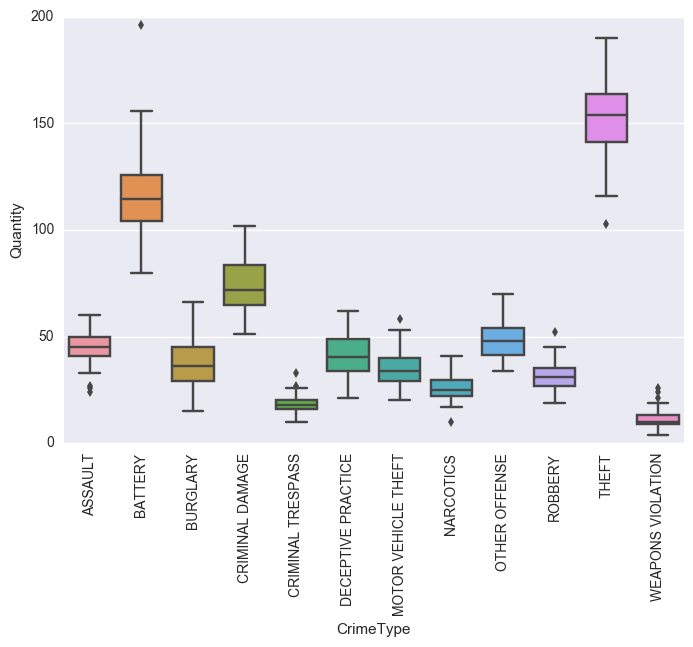

In [18]:
# Plot the boxplot
g = sns.boxplot(data=gr_by_day, x='CrimeType', y = 'Quantity')
plt.xticks(rotation=90)

As we could see in the plot, the three categories with more than 50 crimes/day are: **THEFT**, **BATTERY** and **CRIMINAL DAMAGE**.

### Question 3: For each crime type identified in the last question, use the latitude and longitude into a KDE plot, to analyse its spread.

In [19]:
# Create new datasets for
theft = df[['Latitude','Longitude']][df['Primary Type'] == 'THEFT']
battery = df[['Latitude','Longitude']][df['Primary Type'] == 'BATTERY']
criminal_damage = df[['Latitude','Longitude']][df['Primary Type'] == 'CRIMINAL DAMAGE']

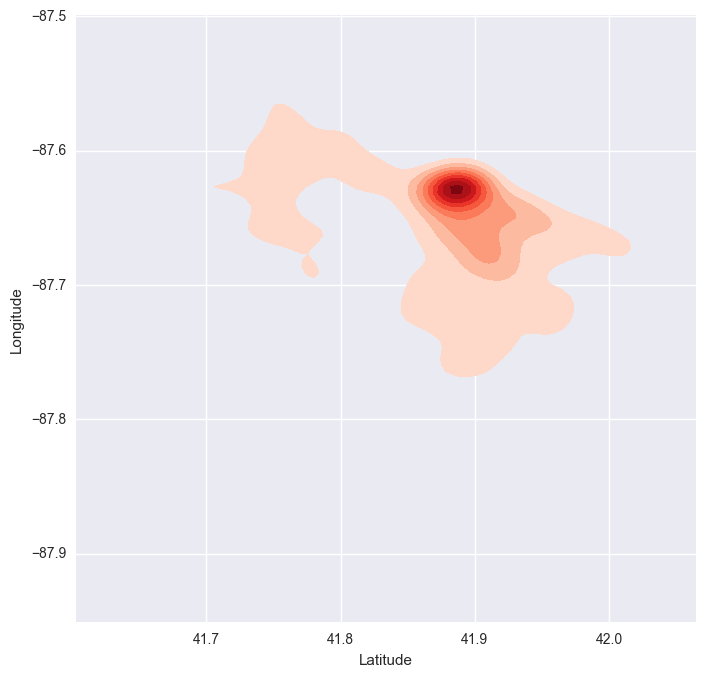

In [20]:
# Plot the THEFT crimes in red
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(theft.Latitude, theft.Longitude, cmap="Reds", shade=True, shade_lowest=False)

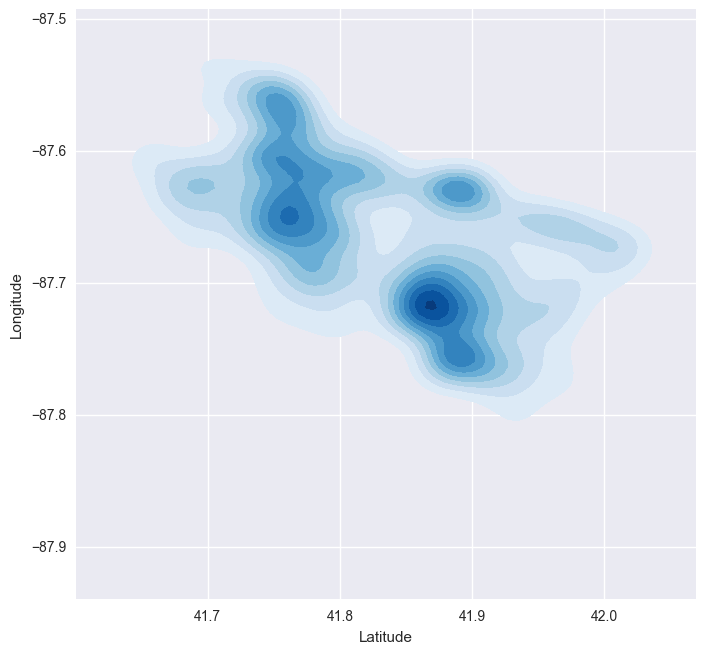

In [21]:
# Plot the BATTERY crimes in blue
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(battery.Latitude, battery.Longitude, cmap="Blues", shade=True, shade_lowest=False)

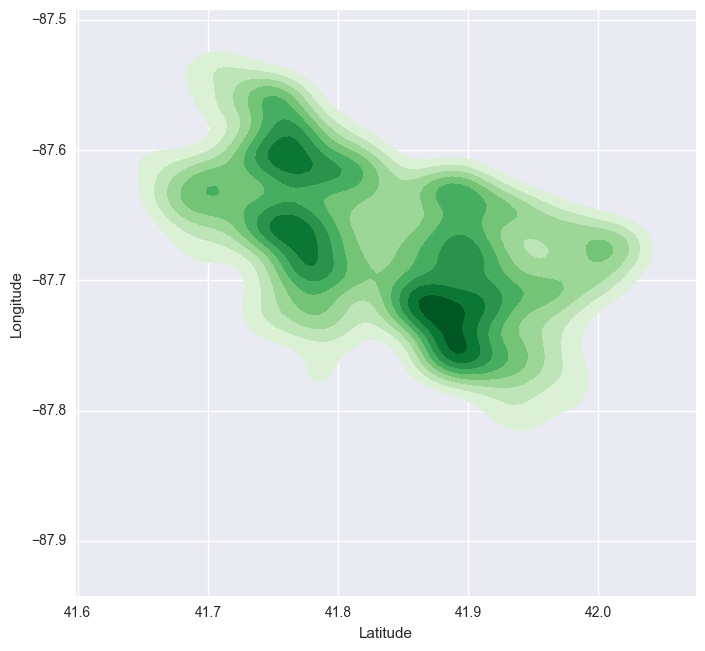

In [22]:
# Plot the CRIMINAL DAMAGE crimes in green
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
ax = sns.kdeplot(criminal_damage.Latitude, criminal_damage.Longitude, cmap="Greens", shade=True, shade_lowest=False)

### Question 4: For each crime type plotted into KDE, discover the mean of the coordinates (latitude and longitude).

In [23]:
# Store means into variables
theft_center_lat = theft.Latitude.mean()
theft_center_long = theft.Longitude.mean()
battery_center_lat = battery.Latitude.mean()
battery_center_long = battery.Longitude.mean()
criminal_damage_center_lat = criminal_damage.Latitude.mean()
criminal_damage_center_long = criminal_damage.Longitude.mean()

In [24]:
# Print the central coordinates
print('THEFT coordinate: ({:f},{:f})'.format(theft_center_lat, theft_center_long))
print('BATTERY coordinate: ({:f},{:f})'.format(battery_center_lat, battery_center_long))
print('CRIMINAL DAMAGE coordinate: ({:f},{:f})'.format(criminal_damage_center_lat, criminal_damage_center_long))

THEFT coordinate: (41.862720,-87.667282)
BATTERY coordinate: (41.831977,-87.668571)
CRIMINAL DAMAGE coordinate: (41.837694,-87.673674)


### Question 5: Go to google maps, plot the coordinates and investigate if the distances are close or not, what could indicate that the area should have more investment in public security.

The distance from Battery and Criminal Damage are very close, two blocks a apart. But Theft is a little bit further.

Using the mean of the values is not the best way to calculate the centrality of the data points. Clustering techniches are much more suitable for this task.